In [175]:
# Załadowanie bibliotek, oraz danych

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [176]:
# Dodanie kolumny z rodzajem kwiatu

df['target'] = iris.target

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [177]:
# Podzielenie danych na X i y

X = df.drop(['variety'], axis=1)
y = df['variety']

In [178]:
# Przeskalowanie danych

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

In [179]:
# Podzielenie danych na dane treningowe, oraz na dane testowe

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

X_train.shape, X_test.shape

((105, 4), (45, 4))

In [180]:
# Nakarmienie modelu danymi treningowymi

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [181]:
# Wykonanie przewidywań na wyuczonym modelu

y_pred = gnb.predict(X_test)

In [182]:
# Sprawdzenie dokładności, oraz testowanie czy istnieje overfitting lub underfitting

from sklearn.metrics import accuracy_score


print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set score: 0.9619
Test set score: 0.9556


In [183]:
# Obliczenie precyzji modelu

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)

print("Precyzja dla każdej klasy:", precision)

Precyzja dla każdej klasy: [1.         0.83333333 1.        ]


<Axes: >

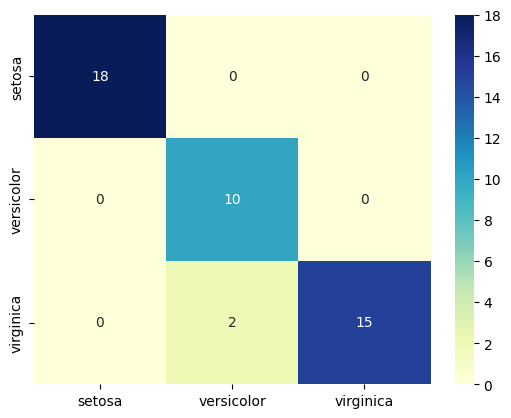

In [184]:
# Wykorzystanie macierzy konfuzji do narysowania wykresu ciepłowego

from sklearn.metrics import confusion_matrix

class_names = iris.target_names

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=class_names, index=class_names)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')